## Link Dataset
https://www.kaggle.com/datasets/manishkc06/engineering-graduate-salary-prediction

## Các thư viện cần thiết

In [16]:
import matplotlib.pyplot as plt
from numpy.random import choice
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(561)

## Đọc file dữ liệu

In [2]:
dataset = pd.read_csv("./Engineering_graduate_salary.csv")

In [3]:
dataset.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


### Số record

In [4]:
len(dataset)

2998

### Các cột của dataset

In [10]:
print(list(dataset))

['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation', '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Salary']


## Làm sạch dữ liệu

### Làm sạch các dữ liệu None

In [64]:
dataset["Deal Terms"] = dataset["Deal Terms"].replace("None", 0)
dataset["Portfolio Exits"] = dataset["Portfolio Exits"].replace("None", 0)
dataset["Investors Count"] = dataset["Investors Count"].replace('None',0)

### Format lại định dạng tiền

In [65]:
def format_total_raised(t_r):
    """
    Hàm format lại Total_Raised về dạng Billion
    t_r : tổng giá trị tăng trưởng ở dạng $xB hoặc $xM
    """
    if t_r == "None":
        return 0
    num = t_r[1:-1]
    post = t_r[-1]
    return float(num) if post == "B" else float(num)/1000

In [66]:
# Loại bỏ kí tự $B ở cột giá trị công ty
dataset["Valuation ($B)"] = dataset["Valuation ($B)"].apply(lambda v:float(v[1:]))
# Tạo cột mới, loại bỏ kì tự $B và chuyển lại giá trị về Billion ở cột Tổng tăng trưởng
dataset["Total Raised ($B)"] = dataset["Total Raised"].apply(lambda r:format_total_raised(r))

## Phương pháp lấy mẫu Bootstrap

In [6]:
def Bootstrap_Statistic(n,M,x):
    """
    n : kích thước mẫu
    M : số lần lấy mẫu bootstrap
    x : khoảng tin cậy
    """
    # Mảng 2 chiều chứa M mẫu kích thước n
    sample = np.array([np.zeros(n)]*M)
    # Mảng chứa M giá trị trung bình
    sample_mean = np.zeros(M)
    for i in range(M):
        # Chọn ra ngẫu nhiên n mẫu
        sample[i] = choice(dataset["Salary"], size=n)
        sample_mean[i] = np.mean(sample[i])

    # print(sample.shape, sample)
    # print(sample_mean.shape, sample_mean)

    # Đồ thị histogram
    sns.histplot(data=sample_mean, kde=True)

    # Mức ý nghĩa
    alpha = (100-x)/2
    # 2 biên khoảng tin cậy
    # Sắp xếp sample_mean tăng dần rồi cắt đi 2 đầu
    sample_mean_asc = np.sort(sample_mean)
    lower_bound = sample_mean_asc[int(alpha/100*M)]
    upper_bound = sample_mean_asc[int((1-alpha/100)*M)]

    # Sử dụng hàm Numpy Percentile
    # lower_bound = np.percentile(sample_mean, alpha)
    # upper_bound = np.percentile(sample_mean, 100-alpha)

    print(">> Dai tin cay : ",lower_bound," - ",upper_bound)
    plt.axvline(lower_bound, color="red", linewidth=2)
    plt.axvline(upper_bound, color="red", linewidth=2)

>> Dai tin cay :  283875.0  -  334875.0


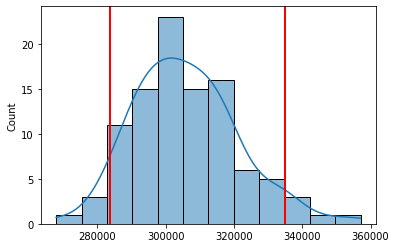

In [15]:
Bootstrap_Statistic(200, 100, 90)

## Thống kê mô tả (Descriptive Statistics) 